In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

import sys
import os

# Get the directory where this notebook is located
notebook_dir = os.path.dirname(os.path.abspath(''))

# Add the PythonPrep directory to the path
pythonprep_dir = os.path.join(os.path.dirname(notebook_dir), 'PythonPrep') if 'PythonPrep' not in notebook_dir else notebook_dir
sys.path.append(pythonprep_dir)

from paths import main_path

In [ ]:
df = pd.read_csv(main_path + '/Democracy/Democracy_Main/MainAnalysis/input/channels21st/new_channels/foreign-direct-investment-net-outflows-as-share-of-gdp.csv')
df


,Entity,Code,Year,"Foreign direct investment, net outflows (% of GDP)"
0,Afghanistan,AFG,1979,0.000000
1,Afghanistan,AFG,1980,0.000000
2,Afghanistan,AFG,1981,0.000000
3,Afghanistan,AFG,2003,0.022119
4,Afghanistan,AFG,2004,-0.013397
...,...,...,...,...
7858,Zimbabwe,ZWE,2018,0.002303
7859,Zimbabwe,ZWE,2019,0.011010
7860,Zimbabwe,ZWE,2020,-0.016272
7861,Zimbabwe,ZWE,2021,0.112790


In [5]:
df[df['Entity']=='Afghanistan']

,Entity,Code,Year,"Foreign direct investment, net outflows (% of GDP)"
0,Afghanistan,AFG,1979,0.000000
1,Afghanistan,AFG,1980,0.000000
2,Afghanistan,AFG,1981,0.000000
3,Afghanistan,AFG,2003,0.022119
4,Afghanistan,AFG,2004,-0.013397
5,Afghanistan,AFG,2005,0.024181
6,Afghanistan,AFG,2008,-0.018973
7,Afghanistan,AFG,2009,0.001990
8,Afghanistan,AFG,2010,-0.007871
9,Afghanistan,AFG,2011,0.006387


In [6]:
df

,Entity,Code,Year,"Foreign direct investment, net outflows (% of GDP)"
0,Afghanistan,AFG,1979,0.000000
1,Afghanistan,AFG,1980,0.000000
2,Afghanistan,AFG,1981,0.000000
3,Afghanistan,AFG,2003,0.022119
4,Afghanistan,AFG,2004,-0.013397
...,...,...,...,...
7858,Zimbabwe,ZWE,2018,0.002303
7859,Zimbabwe,ZWE,2019,0.011010
7860,Zimbabwe,ZWE,2020,-0.016272
7861,Zimbabwe,ZWE,2021,0.112790


In [7]:
df = df[(df['Year'] >= 2001) & (df['Year'] < 2020)]
df

,Entity,Code,Year,"Foreign direct investment, net outflows (% of GDP)"
3,Afghanistan,AFG,2003,0.022119
4,Afghanistan,AFG,2004,-0.013397
5,Afghanistan,AFG,2005,0.024181
6,Afghanistan,AFG,2008,-0.018973
7,Afghanistan,AFG,2009,0.001990
...,...,...,...,...
7855,Zimbabwe,ZWE,2015,0.110203
7856,Zimbabwe,ZWE,2016,0.155728
7857,Zimbabwe,ZWE,2017,0.005315
7858,Zimbabwe,ZWE,2018,0.002303


In [8]:
first_years = df.groupby('Entity')['Year'].min()

countries_starting_in_2001 = first_years[first_years == 2001].index
filtered_df = df[(df['Entity'].isin(countries_starting_in_2001)) & (df['Foreign direct investment, net outflows (% of GDP)'] != 0)]
filtered_df = filtered_df[filtered_df['Entity'].isin(countries_starting_in_2001)]

In [9]:
df = filtered_df.copy()
def filter_countries_starting_in_2001(dataframe):
    first_years = dataframe.groupby("Entity")["Year"].min().reset_index()
    start_in_2001 = first_years[first_years["Year"] == 2001]["Entity"]
    filtered_df = dataframe[dataframe["Entity"].isin(start_in_2001)]
    return filtered_df

filtered_df = filter_countries_starting_in_2001(df)

In [10]:
filtered_df

,Entity,Code,Year,"Foreign direct investment, net outflows (% of GDP)"
89,Algeria,DZA,2001,0.016988
90,Algeria,DZA,2002,0.173660
91,Algeria,DZA,2003,0.041732
92,Algeria,DZA,2004,0.287639
93,Algeria,DZA,2005,0.053295
...,...,...,...,...
7855,Zimbabwe,ZWE,2015,0.110203
7856,Zimbabwe,ZWE,2016,0.155728
7857,Zimbabwe,ZWE,2017,0.005315
7858,Zimbabwe,ZWE,2018,0.002303


In [11]:
pivot_df = filtered_df.pivot(index='Entity', columns='Year', values='Foreign direct investment, net outflows (% of GDP)')

# Reindex to include all years from 2001 to 2019
pivot_df = pivot_df.reindex(columns=range(2001, 2020))

# Reset the index and rename columns
pivot_df.reset_index(inplace=True)


In [12]:
pivot_df

Year,Entity,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Algeria,0.016988,0.173660,0.041732,0.287639,0.053295,0.067506,0.108901,0.185878,0.156273,0.135994,0.266941,-0.019823,-0.129555,-0.008686,0.060925,0.029082,-0.005036,0.483796,0.018135
1,Argentina,0.059873,-0.641746,0.606473,0.410542,0.659696,1.048654,0.523156,0.384706,0.213693,0.227738,0.280671,0.193202,0.161220,0.364900,0.147160,0.320435,0.179549,0.328871,0.340081
2,Aruba,-0.194423,-0.313239,-0.158515,-0.361731,-0.375571,-0.519182,1.477161,0.098251,0.059064,0.111568,0.118600,0.106810,0.162026,0.317621,0.354881,-0.014035,2.689815,0.927008,1.759759
3,Australia,3.524709,1.762140,3.976113,1.591945,-4.702275,3.217794,1.686626,3.019345,1.234314,1.572699,0.589879,0.372413,-0.048799,1.536560,0.610963,-0.257427,0.754013,0.072164,0.716254
4,Austria,1.530006,2.696162,2.615506,2.663692,25.716993,4.784062,20.309053,6.458257,3.872517,-3.652443,8.836366,4.505182,2.564210,-0.197785,-0.560120,-6.799713,2.422530,-5.915302,-1.611817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Uruguay,0.094607,-0.001144,0.011509,0.278091,0.089191,0.070042,0.498621,0.081520,0.276413,-0.375954,0.355953,7.659350,-3.355546,2.988732,3.291142,2.275120,7.266787,3.766367,0.127224
146,Venezuela,0.183059,1.081883,1.017691,0.555796,0.706464,1.215408,0.249605,0.242757,0.750786,0.636075,-0.080573,0.867327,0.058490,0.940378,NaN,NaN,NaN,NaN,NaN
147,World,2.409416,1.857934,1.812954,2.695397,2.930769,4.120222,5.413555,4.005355,2.168555,2.633346,2.949019,2.224702,2.495898,2.171929,2.868110,2.752048,2.535154,0.764698,1.688618
148,Yemen,0.148310,0.262713,0.415180,0.155412,0.141290,0.048523,0.182397,0.854161,0.286021,0.230555,0.176759,0.024056,0.013337,0.026804,0.010435,0.002513,0.020866,0.016688,0.015220


In [13]:
df_d = pivot_df.dropna()

In [14]:
original_entities = set(pivot_df['Entity'].unique())

pivoted_entities = set(df_d['Entity'].unique())

dropped_countries = original_entities - pivoted_entities
dropped_countries
#dropped_countries_df = pd.DataFrame(list(dropped_countries), columns=['Dropped Countries'])

{'Bolivia',
 'Burundi',
 'Cape Verde',
 'Congo',
 'Ghana',
 'Guinea',
 'Guyana',
 'Kyrgyzstan',
 'Low-income countries',
 'Madagascar',
 'Peru',
 'Saint Kitts and Nevis',
 'Tanzania',
 'Trinidad and Tobago',
 'Venezuela',
 'Zimbabwe'}

In [15]:
countries_to_drop = [
    'Bolivia', 'Burundi', 'Cape Verde', 'Congo', 'Ghana', 'Guinea', 
    'Guyana', 'Kyrgyzstan', 'Low-income countries', 'Madagascar', 
    'Peru', 'Saint Kitts and Nevis', 'Tanzania', 'Trinidad and Tobago', 
    'Venezuela', 'Zimbabwe'
]

filtered_df = filtered_df[~filtered_df['Entity'].isin(countries_to_drop)]

In [16]:
filtered_df['growth_rate'] = filtered_df.groupby('Entity')['Foreign direct investment, net outflows (% of GDP)'].pct_change() * 100



/var/folders/qx/x8vtl7yn3_71qbvkk4v8yhym0000gn/T/ipykernel_57016/4269120494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['growth_rate'] = filtered_df.groupby('Entity')['Foreign direct investment, net outflows (% of GDP)'].pct_change() * 100


In [17]:
filtered_df['growth_rate'].describe()

count    2.412000e+03
mean     1.904821e+03
std      6.521922e+04
min     -5.828388e+04
25%     -6.792814e+01
50%     -1.075304e+01
75%      4.955976e+01
max      2.994056e+06
Name: growth_rate, dtype: float64

In [18]:
filtered_df

,Entity,Code,Year,"Foreign direct investment, net outflows (% of GDP)",growth_rate
89,Algeria,DZA,2001,0.016988,NaN
90,Algeria,DZA,2002,0.173660,922.253897
91,Algeria,DZA,2003,0.041732,-75.969389
92,Algeria,DZA,2004,0.287639,589.260431
93,Algeria,DZA,2005,0.053295,-81.471395
...,...,...,...,...,...
7781,Yemen,YEM,2015,0.010435,-61.070003
7782,Yemen,YEM,2016,0.002513,-75.917654
7783,Yemen,YEM,2017,0.020866,730.355155
7784,Yemen,YEM,2018,0.016688,-20.023761


In [19]:
df = filtered_df.copy()

In [20]:
df.Entity.nunique()

134

In [21]:
df[df['Entity']=='Belarus']

,Entity,Code,Year,"Foreign direct investment, net outflows (% of GDP)",growth_rate
628,Belarus,BLR,2001,0.002428,NaN
629,Belarus,BLR,2002,-1.412822,-58283.877768
630,Belarus,BLR,2003,0.008415,-100.595612
631,Belarus,BLR,2004,0.005618,-33.242554
632,Belarus,BLR,2005,0.008275,47.311742
633,Belarus,BLR,2006,0.008116,-1.920311
634,Belarus,BLR,2007,0.033572,313.629292
635,Belarus,BLR,2008,0.050369,50.031272
636,Belarus,BLR,2009,0.201088,299.233285
637,Belarus,BLR,2010,0.088412,-56.033138


In [22]:
periods = {
    '2001-2019': (2001, 2019),
}

result_df = pd.DataFrame()

for period, (start_year, end_year) in periods.items():

    period_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    gr = period_df.groupby('Entity')['growth_rate'].mean().rename(period)
    
    result_df = pd.concat([result_df, gr], axis=1)

result_df.reset_index(inplace=True)
result_df['country'] = result_df['index']
result_df = result_df.drop('index', axis=1)
result_df = result_df[['country'] + [col for col in result_df.columns if col != 'country']]

result_df.rename(columns={
    '2001-2019': 'mean_fdi_2001_2019',
}, inplace=True)

result_df

,country,mean_fdi_2001_2019
0,Algeria,-491.149206
1,Argentina,-66.162228
2,Aruba,-1079.775384
3,Australia,-211.266795
4,Austria,60.220484
...,...,...
129,United States,8.468986
130,Upper-middle-income countries,10.514041
131,Uruguay,173.842625
132,World,6.187870


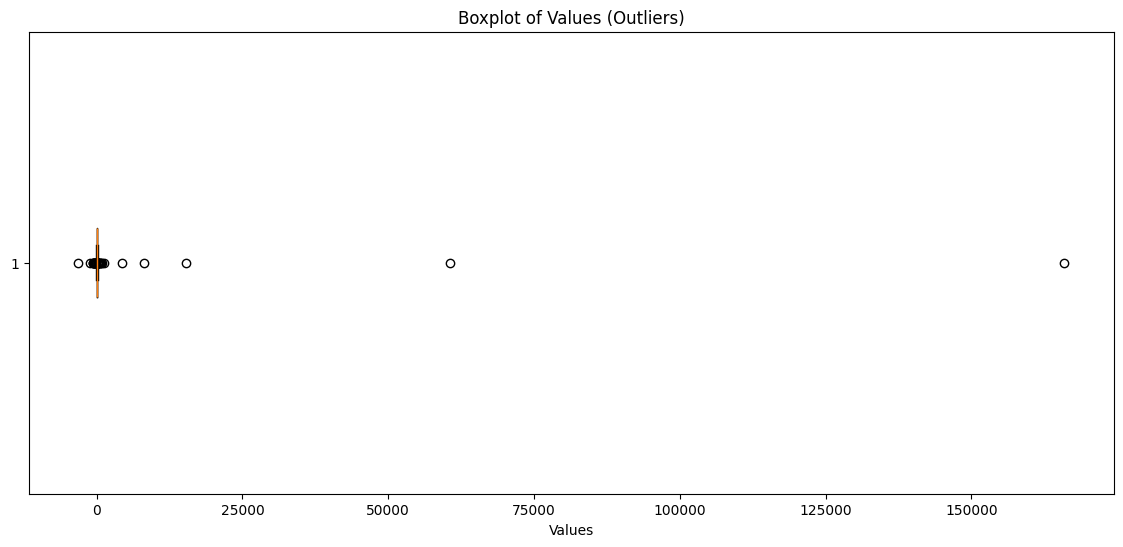

In [23]:
plt.figure(figsize=(14, 6))
plt.boxplot(result_df['mean_fdi_2001_2019'], vert=False)
plt.title('Boxplot of Values (Outliers)')
plt.xlabel('Values')
plt.show()

In [24]:
result_df[result_df['mean_fdi_2001_2019']==np.inf]

,country,mean_fdi_2001_2019


In [25]:
result_df.mean_fdi_2001_2019.describe()

count       134.000000
mean       1904.821353
std       15281.539037
min       -3205.034059
25%         -11.172300
50%          24.974316
75%          84.180607
max      165924.520219
Name: mean_fdi_2001_2019, dtype: float64

In [26]:
# def detect_and_delete_outliers_with_iqr(df, column):

#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)

#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

#     return df_cleaned

In [27]:
# cleaned_df = detect_and_delete_outliers_with_iqr(result_df, column='mean_fdi_2001_2019')
# cleaned_df

In [28]:
# cleaned_df.describe()

In [29]:
# cleaned_df.to_csv(main_path + '/Democracy/MainAnalysis/input/channels21st/new_channels/fdi.csv', index=False)



In [30]:
# def detect_outliers_with_zscore(df, column, threshold=0.5):
    
#     mean = np.mean(df[column])
#     std_dev = np.std(df[column])

#     df['z_score'] = (df[column] - mean) / std_dev
#     df['is_outlier'] = np.abs(df['z_score']) > threshold

#     return df

In [31]:
# result_df = detect_outliers_with_zscore(result_df, column='mean_fdi_2001_2019', threshold=0.5)

In [32]:
# result_df

In [33]:
# result_df[result_df['is_outlier']==True]

In [34]:
# result_df = result_df[result_df['is_outlier']==False]

In [35]:
# result_df.describe()

In [36]:
# result_df = detect_outliers_with_zscore(result_df, column='mean_fdi_2001_2019', threshold=4)

In [37]:
# result_df[result_df['is_outlier']==True]

In [38]:
# result_df = result_df[result_df['is_outlier']==False]
# result_df.describe()

In [39]:
# def detect_outliers_mahalanobis(df, column, threshold=0.90):
#     mean = df[column].mean()
#     variance = df[column].var()
#     df['mahalanobis_distance'] = ((df[column] - mean) ** 2) / variance
#     chi_squared_critical_value = chi2.ppf(threshold, 1)
#     df['is_outlier'] = df['mahalanobis_distance'] > chi_squared_critical_value
#     return df

In [40]:
# res_df = detect_outliers_mahalanobis(result_df, column='mean_fdi_2001_2019', threshold=0.8)

In [41]:
# res_df

In [42]:
# res_df[res_df['is_outlier']==True]

In [43]:
# res_df = res_df[res_df['is_outlier']==False]

In [44]:
# res_df.describe()

In [45]:
# res_df = detect_outliers_mahalanobis(res_df, column='mean_fdi_2001_2019', threshold=0.9)

In [46]:
# res_df[res_df['is_outlier']==True]

In [47]:
# result_df[result_df['mean_fdi_2001_2019']>4000]

In [48]:
# result_df[result_df['mean_fdi_2001_2019']<-4000]


In [49]:
result_df = result_df[result_df['mean_fdi_2001_2019']<4000]
result_df = result_df[result_df['mean_fdi_2001_2019']>-4000]
result_df

,country,mean_fdi_2001_2019
0,Algeria,-491.149206
1,Argentina,-66.162228
2,Aruba,-1079.775384
3,Australia,-211.266795
4,Austria,60.220484
...,...,...
129,United States,8.468986
130,Upper-middle-income countries,10.514041
131,Uruguay,173.842625
132,World,6.187870


In [50]:
result_df.describe()

,mean_fdi_2001_2019
count,129.000000
mean,7.299283
std,380.549777
min,-3205.034059
25%,-17.322501
50%,19.723361
75%,72.830369
max,1296.210563


In [ ]:
result_df.to_csv(main_path + '/Democracy/Democracy_Main/MainAnalysis/input/channels21st/new_channels/fdi.csv', index=False)

